# Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

#### Sebastián Gómez Chaves; B42866
#### Grupo 02

# Tarea 3

1. A partir de los datos, encontrar la mejor curva de ajuste (modelo probabilístico) para las funciones de densidad marginales de X y Y.

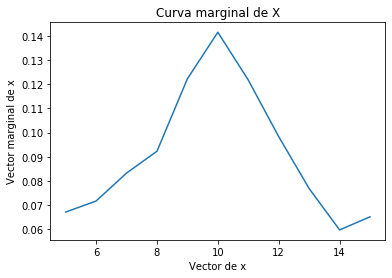

Text(0.5, 1.0, 'Curva marginal de Y')

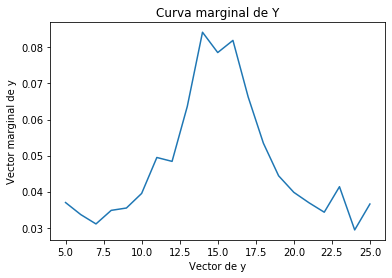

In [2]:
import mpl_toolkits.mplot3d as mpl
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xy = pd.read_csv("xy.csv",header=0,index_col=0) #Lectura de archivo "xy.csv"
xyp = pd.read_csv("xyp.csv",header=0) #Lectura de archivo "xyp.csv"


xs=np.linspace(5,15,11) #Definiendo el vector de x
ys=np.linspace(5,25,21) #Definiendo el vector de y

X=np.sum(xy,axis=1) #Calculo del vector marginal de x
Y=np.sum(xy,axis=0) #Calculo del vector marginal de y

plt.plot(xs,X);
plt.xlabel('Vector de x');
plt.ylabel('Vector marginal de x');
plt.title('Curva marginal de X')
plt.show() 
plt.plot(ys,Y);
plt.xlabel('Vector de y');
plt.ylabel('Vector marginal de y');
plt.title('Curva marginal de Y')


[9.90484381 3.29944288]
[15.0794609   6.02693775]


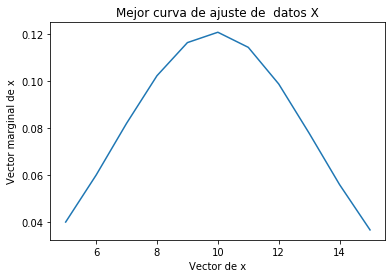

Text(0.5, 1.0, 'Mejor curva de ajuste de datos Y')

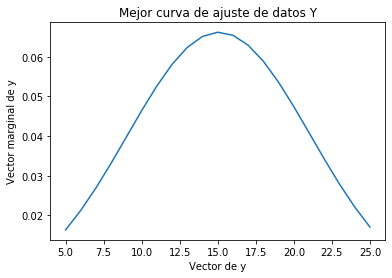

In [110]:
#Definicion de la curva de ajuste Gaussiana
def gaussiana(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

paramX,_=curve_fit(gaussiana,xs,X) #Parametros de x
print(paramX)
paramY,_=curve_fit(gaussiana,ys,Y) #Parametros de y
print(paramY)
plt.plot(xs,gaussiana(xs,paramX[0],paramX[1]));
plt.xlabel('Vector de x');
plt.ylabel('Vector marginal de x');
plt.title('Mejor curva de ajuste de  datos X')
plt.show() 
plt.plot(ys,gaussiana(ys,paramY[0],paramY[1]));
plt.xlabel('Vector de y');
plt.ylabel('Vector marginal de y');
plt.title('Mejor curva de ajuste de datos Y')

2. Asumir independencia de X y Y. Analíticamente, ¿cuál es entonces la expresión de la función de densidad conjunta que modela los datos?

In [ ]:
Es la multiplicacion de las dos funciones marginales encontradas 

3. Hallar los valores de correlación, covarianza y coeficiente de correlación (Pearson) para los datos y explicar su significado

In [4]:
#Correlación

#Se extraen los datos del archivo "xyp.csv"
x1 = xyp["x"]
y1 = xyp["y"]
p1 = xyp["p"]
correlacion=0;

for i in range(231):
    correlacion= correlacion + x1[i]*y1[i]*p1[i];
    
print('El valor hallado de correlación es: ',correlacion)

#Covarianza 
mux=9.90484381
muy=15.0794609
covarianza= correlacion-(mux*muy)
print('El valor hallado para la covarianza es: ',covarianza)

#Coeficiente de covarianza
sigmax=3.29944288
sigmay=6.02693775

coeficiente=covarianza/(sigmax*sigmay)
print('El valor hallado para el coeficiente de correlación corresponde a: ',coeficiente)

El valor hallado de correlación es:  149.54281000000012
El valor hallado para la covarianza es:  0.183105046498099
El valor hallado para el coeficiente de correlación corresponde a:  0.009207950879217261


4. Graficar las funciones de densidad marginales (2D), la función de densidad conjunta (3D)

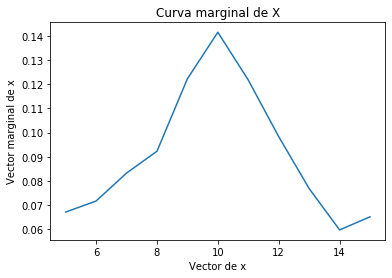

Text(0.5, 1.0, 'Curva marginal de Y')

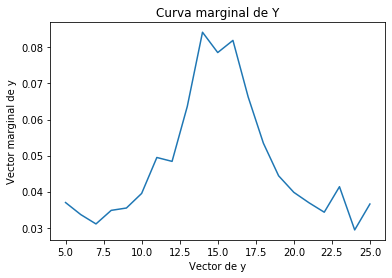

In [121]:
# Funciones de densidad marginales (2D)
plt.plot(xs,X);
plt.xlabel('Vector de x');
plt.ylabel('Vector marginal de x');
plt.title('Curva marginal de X')
plt.show() 
plt.plot(ys,Y);
plt.xlabel('Vector de y');
plt.ylabel('Vector marginal de y');
plt.title('Curva marginal de Y')

Text(0.5, 0, 'Z ')

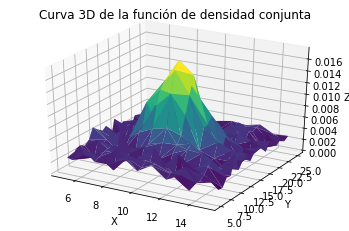

In [118]:
#  Función de densidad conjunta (3D)
ax = plt.axes(projection='3d')

zdata = p1
xdata = x1
ydata = y1

ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis')

ax.set_title('Curva 3D de la función de densidad conjunta')
ax.set_xlabel('X')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
#BrBG
#viridis